In [ ]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
# Unzip the downloaded dataset
from zipfile import ZipFile
with ZipFile("/content/drive/MyDrive/Plant-diseases.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
print(len(os.listdir("/content/Plant-diseases/valid/Apple___Apple_scab")))
print(os.listdir("/content/Plant-diseases/valid/Apple___Apple_scab")[:5])

504
['0395b847-2c73-4674-826f-33a6afb5b4fe___FREC_Scab 3287_new30degFlipLR.JPG', '334f8e1a-5989-476e-88f4-8a45c304e12c___FREC_Scab 3035.JPG', '462f0ef8-5460-4f5c-8935-62a204d3fc08___FREC_Scab 2924_90deg.JPG', '815d2612-ee00-407a-8a0d-d0d94c7e0a9f___FREC_Scab 3461.JPG', '72d9363f-1e23-4154-92bd-5f34a149d444___FREC_Scab 2980_new30degFlipLR.JPG']


In [ ]:
# Dataset Path
train_dir = '/content/Plant-diseases/train'

In [ ]:
valid_dir = '/content/Plant-diseases/valid'

(256, 256, 3)


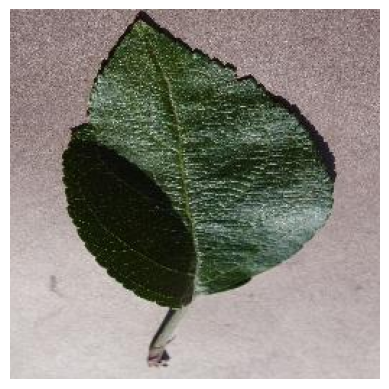

In [ ]:
image_path = '/content/Plant-diseases/train/Apple___healthy/0055dd26-23a7-4415-ac61-e0b44ebfaf80___RS_HL 5672.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
# Image Parameters
img_size = 128
batch_size = 32

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Train Test Split

In [ ]:
# Image Data Generators
val_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Train Generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)
# Validation Generator
validation_generator =val_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 31520 images belonging to 17 classes.
Found 7880 images belonging to 17 classes.


Convolutional Neural Network (CNN)


In [ ]:
# Model Definition
model = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(img_size, img_size, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Block 3
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),

    # Block 4
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    # Classification head
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(17, activation='softmax')  # 17 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 17)             │         4,369 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 460,497 (1.76 MB)

 Trainable params: 459,537 (1.75 MB)

 Non-trainable params: 960 (3.75 KB)

Model training

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint, ReduceLROnPlateau
# EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/plant_disease_last_model(128x128).h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)
# Train the model with EarlyStopping
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stop,checkpoint, reduce_lr]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
985/985 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5990 - loss: 1.2151
Epoch 1: val_loss improved from inf to 4.38506, saving model to /content/drive/MyDrive/plant_disease_last_model(128x128).h5


985/985 ━━━━━━━━━━━━━━━━━━━━ 2436s 2s/step - accuracy: 0.5991 - loss: 1.2147 - val_accuracy: 0.3182 - val_loss: 4.3851 - learning_rate: 0.0010
Epoch 2/20
985/985 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8653 - loss: 0.4040
Epoch 2: val_loss improved from 4.38506 to 1.10986, saving model to /content/drive/MyDrive/plant_disease_last_model(128x128).h5


985/985 ━━━━━━━━━━━━━━━━━━━━ 2436s 2s/step - accuracy: 0.8653 - loss: 0.4040 - val_accuracy: 0.6925 - val_loss: 1.1099 - learning_rate: 0.0010
Epoch 3/20
985/985 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9197 - loss: 0.2411
Epoch 3: val_loss improved from 1.10986 to 0.48937, saving model to /content/drive/MyDrive/plant_disease_last_model(128x128).h5


985/985 ━━━━━━━━━━━━━━━━━━━━ 2420s 2s/step - accuracy: 0.9197 - loss: 0.2411 - val_accuracy: 0.8599 - val_loss: 0.4894 - learning_rate: 0.0010
Epoch 4/20
985/985 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9400 - loss: 0.1796
Epoch 4: val_loss improved from 0.48937 to 0.32403, saving model to /content/drive/MyDrive/plant_disease_last_model(128x128).h5


985/985 ━━━━━━━━━━━━━━━━━━━━ 2484s 3s/step - accuracy: 0.9400 - loss: 0.1796 - val_accuracy: 0.8991 - val_loss: 0.3240 - learning_rate: 0.0010
Epoch 5/20
985/985 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9481 - loss: 0.1549
Epoch 5: val_loss improved from 0.32403 to 0.15959, saving model to /content/drive/MyDrive/plant_disease_last_model(128x128).h5


985/985 ━━━━━━━━━━━━━━━━━━━━ 2444s 2s/step - accuracy: 0.9481 - loss: 0.1549 - val_accuracy: 0.9492 - val_loss: 0.1596 - learning_rate: 0.0010
Epoch 6/20
985/985 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9533 - loss: 0.1414
Epoch 6: val_loss improved from 0.15959 to 0.13389, saving model to /content/drive/MyDrive/plant_disease_last_model(128x128).h5


985/985 ━━━━━━━━━━━━━━━━━━━━ 2482s 2s/step - accuracy: 0.9533 - loss: 0.1414 - val_accuracy: 0.9586 - val_loss: 0.1339 - learning_rate: 0.0010
Epoch 7/20
985/985 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9628 - loss: 0.1159
Epoch 7: val_loss did not improve from 0.13389
985/985 ━━━━━━━━━━━━━━━━━━━━ 2422s 2s/step - accuracy: 0.9628 - loss: 0.1160 - val_accuracy: 0.5733 - val_loss: 2.7775 - learning_rate: 0.0010
Epoch 8/20
985/985 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9602 - loss: 0.1242
Epoch 8: val_loss did not improve from 0.13389

Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
985/985 ━━━━━━━━━━━━━━━━━━━━ 2484s 3s/step - accuracy: 0.9602 - loss: 0.1242 - val_accuracy: 0.6263 - val_loss: 2.9379 - learning_rate: 0.0010
Epoch 9/20
985/985 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9723 - loss: 0.0836
Epoch 9: val_loss did not improve from 0.13389
985/985 ━━━━━━━━━━━━━━━━━━━━ 2415s 2s/step - accuracy: 0.9723 - loss: 0.0836 - val_accuracy: 0.944

Model Evaluation

In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")



Evaluating model...
246/246 ━━━━━━━━━━━━━━━━━━━━ 124s 503ms/step - accuracy: 0.9582 - loss: 0.1322
Validation Accuracy: 95.87%


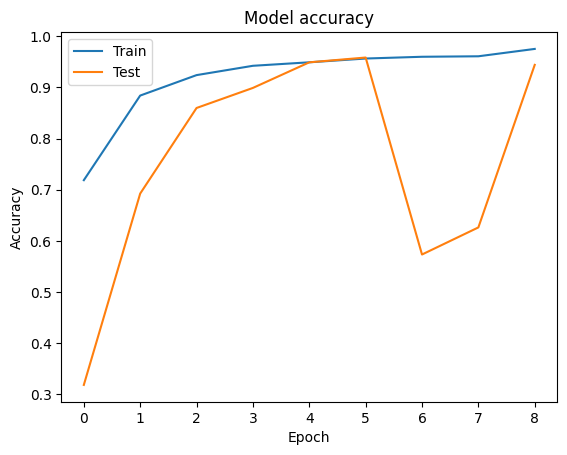

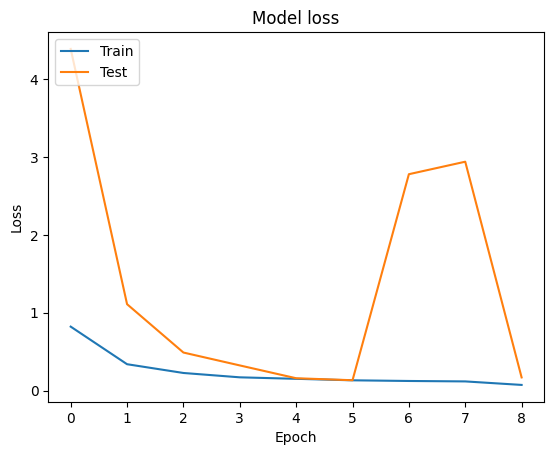

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Building a Predictive System

In [ ]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Cherry_(including_sour)___Powdery_mildew',
 5: 'Cherry_(including_sour)___healthy',
 6: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 7: 'Corn_(maize)___Common_rust_',
 8: 'Corn_(maize)___Northern_Leaf_Blight',
 9: 'Corn_(maize)___healthy',
 10: 'Grape___Black_rot',
 11: 'Grape___Esca_(Black_Measles)',
 12: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 13: 'Grape___healthy',
 14: 'Potato___Early_blight',
 15: 'Potato___Late_blight',
 16: 'Potato___healthy'}

In [ ]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
image_path = '/content/Plant-diseases/test/Cherry_(including_sour)___Powdery_mildew.JPG'
#image_path = '/content/black-rot-of-grape_figure-1.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Predicted Class Name: Cherry_(including_sour)___Powdery_mildew
